In [70]:
# Regular EDA and Plotting LIbraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For plots to appear in the notebook
%matplotlib inline

# Models from Scikit Learn
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Model Evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from scipy.stats import uniform, randint

### Import Data

In [3]:
salaries = pd.read_csv('Salary_Data.csv')

### Check the Head of the Data Frame

In [4]:
salaries.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32,Male,Barchelor's Degree,Software Engineer,5.0,90000.0
1,28,Female,Master's Degree,Data Analyst,3.0,65000.0
2,45,Male,PhD,Senior Manager,15.0,150000.0
3,36,Female,Barchelor's Degree,Sales Associate,7.0,60000.0
4,52,Male,Master's Degree,Director,20.0,200000.0


### Number of Entries in the Data

In [5]:
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6702 entries, 0 to 6701
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   int64  
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 314.3+ KB


### Cleaning Data

In [6]:
len(salaries)

6702

In [7]:
salaries.isna().sum()

Age                    0
Gender                 0
Education Level        1
Job Title              0
Years of Experience    1
Salary                 3
dtype: int64

In [8]:
# Drop the rows with no labels
salaries.dropna(subset=['Salary'], inplace= True)
salaries.isna().sum()

Age                    0
Gender                 0
Education Level        1
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [9]:
# Fill missing values with scikit-learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with "missing" & numerical values with mean
cat_imputer = SimpleImputer(strategy = "constant", fill_value="missing")
num_imputer = SimpleImputer(strategy = "mean")

# Define columns
cat_features = ["Gender", "Education Level", "Job Title"]
num_features = ["Years of Experience", "Age", "Salary"]

# Create an imputer (Something that fills missing data)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("num_imputer", num_imputer, num_features)
])

# Transform the data 
filled_x = imputer.fit_transform(salaries)

filled_x

array([['Male', "Barchelor's Degree", 'Software Engineer', 5.0, 32.0,
        90000.0],
       ['Female', "Master's Degree", 'Data Analyst', 3.0, 28.0, 65000.0],
       ['Male', 'PhD', 'Senior Manager', 15.0, 45.0, 150000.0],
       ...,
       ['Female', "Barchelor's Degree", 'Financial Manager', 4.0, 30.0,
        55000.0],
       ['Male', "Master's Degree", 'Marketing Manager', 14.0, 46.0,
        140000.0],
       ['Female', 'High School', 'Sales Executive', 1.0, 26.0, 35000.0]],
      dtype=object)

In [10]:
new_salary_data = pd.DataFrame(filled_x,
                                columns=["Gender", "Education Level", "Job Title", "Years of Experience", "Age", "Salary"])
new_salary_data

,Gender,Education Level,Job Title,Years of Experience,Age,Salary
0,Male,Barchelor's Degree,Software Engineer,5.0,32.0,90000.0
1,Female,Master's Degree,Data Analyst,3.0,28.0,65000.0
2,Male,PhD,Senior Manager,15.0,45.0,150000.0
3,Female,Barchelor's Degree,Sales Associate,7.0,36.0,60000.0
4,Male,Master's Degree,Director,20.0,52.0,200000.0
...,...,...,...,...,...,...
6694,Female,PhD,Director of Marketing,20.0,49.0,200000.0
6695,Male,High School,Sales Associate,3.0,32.0,50000.0
6696,Female,Barchelor's Degree,Financial Manager,4.0,30.0,55000.0
6697,Male,Master's Degree,Marketing Manager,14.0,46.0,140000.0


In [11]:
new_salary_data.isna().sum()

Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Age                    0
Salary                 0
dtype: int64

## Data Analysis

In [12]:
# Average Salary given to each staff

new_salary_data['Salary'].mean()

115326.96477086132

In [13]:
# Minimum Salary Earned

new_salary_data['Salary'].min() 

350.0

In [14]:
# Maximum Salary Earned

new_salary_data['Salary'].max()

250000.0

In [15]:
# Highest Paid Salary by Gender

Max = new_salary_data.groupby('Gender')['Salary'].max()

print ("Highest paid staffs per", Max)

Highest paid staffs per Gender
Female    220000.0
Male      250000.0
Other     166109.0
Name: Salary, dtype: object


In [16]:
# Lowest Paid Salary by Gender

Min = new_salary_data.groupby('Gender')['Salary'].min()

print ("lowest paid staffs per", Min)

lowest paid staffs per Gender
Female      500.0
Male        350.0
Other     62852.0
Name: Salary, dtype: object


## Visual Representation of Gender Distribution

<Axes: xlabel='Gender', ylabel='count'>

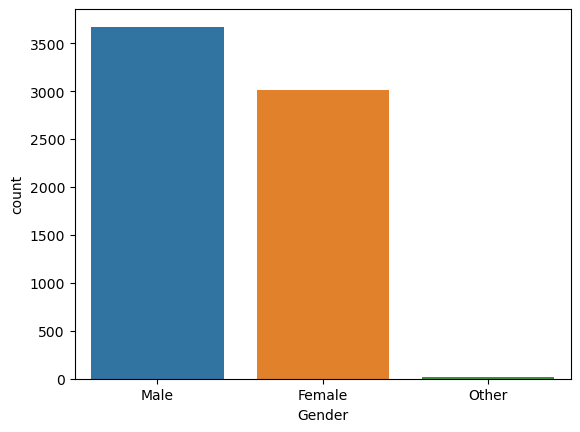

In [17]:
sns.countplot(x = "Gender", data = new_salary_data)

In [18]:
## Average Salary by Gender

Sal_sex = new_salary_data.groupby('Gender')['Salary'].mean()
Sal_sex

Gender
Female    107888.998672
Male      121389.870915
Other     125869.857143
Name: Salary, dtype: object

## Visualization of Average Salary Earned by Gender

<Axes: xlabel='Gender', ylabel='Salary'>

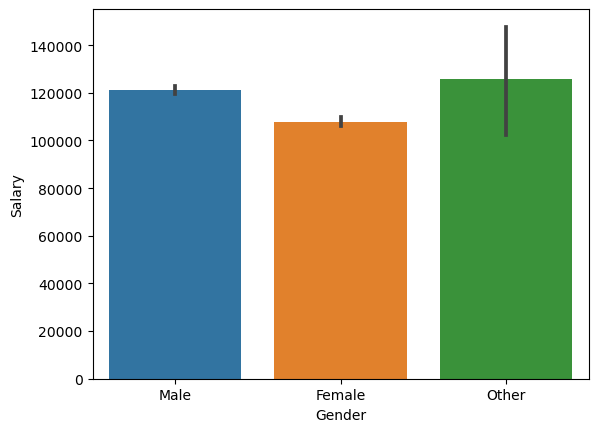

In [19]:
sns.barplot(x = "Gender", y = "Salary", data = new_salary_data)

## Visualization of Years of Experience with Salary

<Axes: xlabel='Years of Experience', ylabel='Salary'>

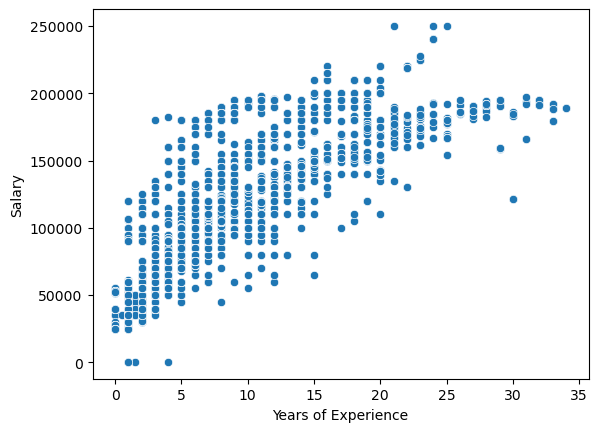

In [20]:
sns.scatterplot(x= "Years of Experience", y= "Salary", data = new_salary_data)

## Average Salary Earned by Educational Level 

<Axes: xlabel='Education Level', ylabel='Salary'>

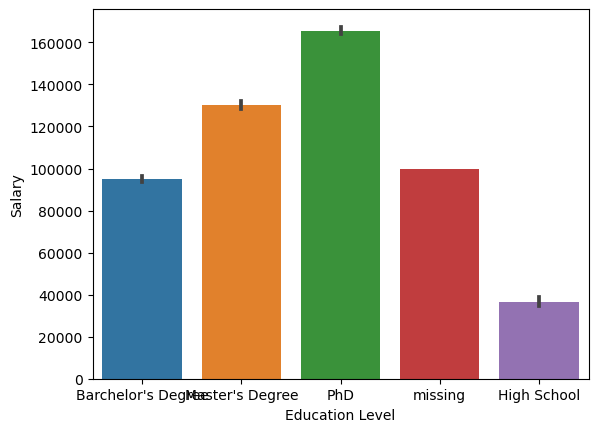

In [21]:
sns.barplot(x = "Education Level", y = "Salary", data = new_salary_data)

## Average Salary by age

<Axes: xlabel='Age', ylabel='Salary'>

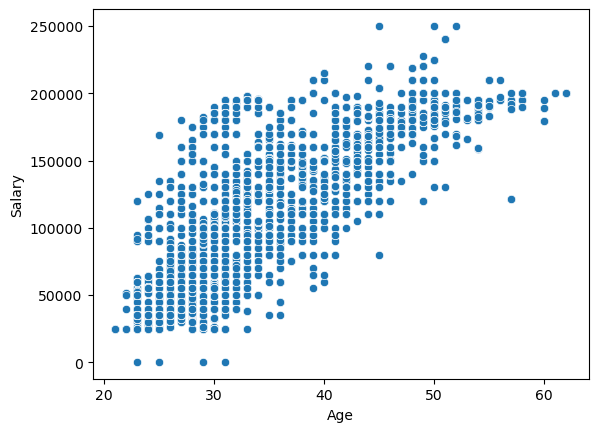

In [22]:
sns.scatterplot(x= "Age", y= "Salary", data = new_salary_data)

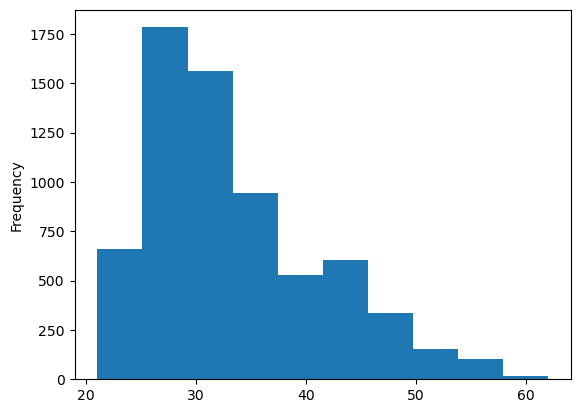

In [23]:
# Age Distribution
new_salary_data.Age.plot.hist();

## Creating a Model

In [24]:
# Models from Scikit Learn
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Model Evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report


In [25]:
# Make the data
X = new_salary_data.drop("Salary", axis = 1)
y = new_salary_data["Salary"]

In [26]:
# # Turn the categories into numbers

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Gender", "Job Title", "Education Level"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")

transformed_x = transformer.fit_transform(new_salary_data)
transformed_x

<6699x203 sparse matrix of type '<class 'numpy.float64'>'
	with 40074 stored elements in Compressed Sparse Row format>

In [27]:
new_salary = transformed_x

In [28]:
new_salary

<6699x203 sparse matrix of type '<class 'numpy.float64'>'
	with 40074 stored elements in Compressed Sparse Row format>

In [29]:
# Split data into train and test sets
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(new_salary,
                                                    y,
                                                    test_size=0.3)

In [30]:
y_train, len(y_train)

(4264     26000.0
 5184     60000.0
 838     110000.0
 1087    100000.0
 5250    185000.0
           ...   
 3772    110000.0
 5191    150000.0
 5226    120000.0
 5390    120000.0
 860     110000.0
 Name: Salary, Length: 4689, dtype: object,
 4689)

Now we've got our data split into training and test sets, it's time to build a machine learning model.

We'll train it (find the patterns) on the training set.

And we'll test it (use the patterns) on the test set.

We're going to try 3 different machine learning models:
* Linear Regression
* Ridge Regression
* Lasso Regression

In [31]:
# Put models in a dictionary
models = {"Ridge Regression": Ridge(),
          "Linear Regression": LinearRegression(), 
          "Lasso Regression": Lasso(),
          "Random Forest Regression": RandomForestRegressor()}

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [32]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

{'Ridge Regression': 0.9999999999999998,
 'Linear Regression': 0.9999999999999998,
 'Lasso Regression': 1.0,
 'Random Forest Regression': 0.9999003069859737}

### Model Comparison

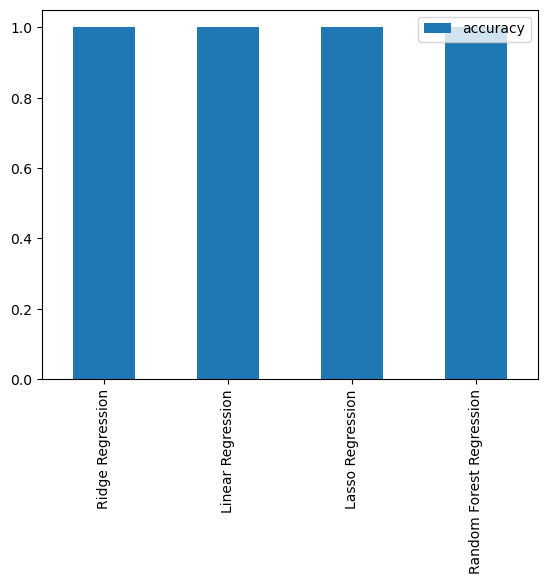

In [33]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();

## Model Evaluation

We'll be using the following evaluation metrics for our regression model:

* R^2
* Mean absolute
* Mean squared error

In [34]:
# Evaluating Linear Regression
model = LinearRegression()

model.fit(X_train, y_train);

In [35]:
model.score(X_train, y_train)

0.9999999999999998

In [36]:
y_predicted = model.predict(X_test)

In [37]:
mae = mean_absolute_error(y_test, y_predicted)
mse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

print("The model performance for training set")
print("-----------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('r2 score is {}'.format(r2))

The model performance for training set
-----------------------
MAE is 0.000664983163657477
MSE is 7.599196793410946e-07
r2 score is 0.9999999999999998


In [38]:
## Evaluating Random Forest Regression

model_1 = RandomForestRegressor()

model_1.fit(X_train, y_train);

In [39]:
model_1.score(X_train, y_train)

0.9999962203294921

In [40]:
y_predicted_1 = model_1.predict(X_test)

In [41]:
mae = mean_absolute_error(y_test, y_predicted_1)
mse = mean_squared_error(y_test, y_predicted_1)
r2 = r2_score(y_test, y_predicted_1)

print("The model performance for training set")
print("-----------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('r2 score is {}'.format(r2))

The model performance for training set
-----------------------
MAE is 32.73745771144282
MSE is 269816.17631945276
r2 score is 0.9999041099424414


In [42]:
## Evaluating Ridge Regression

model_2 = Ridge()

model_2.fit(X_train, y_train);

In [43]:
model_2.score(X_train, y_train)

0.9999999999999998

In [44]:
y_predicted_2 = model_2.predict(X_test)

In [58]:
mae = mean_absolute_error(y_test, y_predicted_2)
mse = mean_squared_error(y_test, y_predicted_2)
r2 = r2_score(y_test, y_predicted_2)

print("The model performance for training set")
print("-----------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('r2 score is {}'.format(r2))

The model performance for training set
-----------------------
MAE is 0.0006649834572359753
MSE is 7.599196979648708e-07
r2 score is 0.9999999999999998


In [59]:
## Evaluating Lasso Regression

model_3 = Lasso()

model_3.fit(X_train, y_train);

In [53]:
model_3.score(X_train, y_train)

1.0

In [55]:
y_predicted_3 = model_3.predict(X_test)

In [57]:
mae = mean_absolute_error(y_test, y_predicted_3)
mse = mean_squared_error(y_test, y_predicted_3)
r2 = r2_score(y_test, y_predicted_3)

print("The model performance for training set")
print("-----------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('r2 score is {}'.format(r2))

The model performance for training set
-----------------------
MAE is 1.6512527120775035e-05
MSE is 3.662116112623893e-10
r2 score is 1.0


## Tuning of Hyperparameters with RandomizedSearchCV

In [93]:
## With Linear Regressor

params = {
'copy_X': [True, False],
    'fit_intercept': [True, False],
    'n_jobs': [None, 1, 2, 4],
    'positive': [False]
} 

np.random.seed(42)

# Split into X & y
X_train, X_test, y_train, y_test = train_test_split(new_salary,
                                                    y,
                                                    test_size=0.3)

# Instantiate Linear Regression
model =  LinearRegression()

# Setup RandomizedSearchCV
rs_model = RandomizedSearchCV(estimator=model,
                            param_distributions=params, 
                            n_iter=10, 
                            cv=5,
                            verbose=2)

# Fit the RandomizedSearchCV version of model
rs_result = rs_model.fit(X_train, y_train);
print('Best Params: ', rs_result.best_score_*100)
print('Best Score: ', rs_result.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END copy_X=False, fit_intercept=True, n_jobs=2, positive=False; total time=   0.0s
[CV] END copy_X=False, fit_intercept=True, n_jobs=2, positive=False; total time=   0.0s
[CV] END copy_X=False, fit_intercept=True, n_jobs=2, positive=False; total time=   0.0s
[CV] END copy_X=False, fit_intercept=True, n_jobs=2, positive=False; total time=   0.0s
[CV] END copy_X=False, fit_intercept=True, n_jobs=2, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=False, n_jobs=4, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=False, n_jobs=4, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=False, n_jobs=4, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=False, n_jobs=4, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=False, n_jobs=4, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=4, positiv

In [95]:
## With RandomForestRegressor
params = {"n_estimators": [50, 100, 200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": [0.1,1],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}

np.random.seed(42)

# Split into X & y
X_train, X_test, y_train, y_test = train_test_split(new_salary,
                                                    y,
                                                    test_size=0.3)

# Instantiate RandomForestRegressor
model_1 = RandomForestRegressor(n_jobs=1)

# Setup RandomizedSearchCV
rs_model_1 = RandomizedSearchCV(estimator=model_1,
                            param_distributions=params, 
                            n_iter=10, 
                            cv=5,
                            verbose=2)

# Fit the RandomizedSearchCV version of model
rs_result1 = rs_model_1.fit(X_train, y_train);
print('Best Params: ', rs_result1.best_score_*100)
print('Best Score: ', rs_result1.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=0.1, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   3.5s
[CV] END max_depth=10, max_features=0.1, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   4.1s
[CV] END max_depth=10, max_features=0.1, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   4.0s
[CV] END max_depth=10, max_features=0.1, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   2.6s
[CV] END max_depth=10, max_features=0.1, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   3.7s
[CV] END max_depth=30, max_features=0.1, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   3.1s
[CV] END max_depth=30, max_features=0.1, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   3.1s
[CV] END max_depth=30, max_features=0.1, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total 

In [97]:
## With Ridge Regression

# Define the hyperparameter grid for random search
params = {
    'alpha': uniform(0.1, 10),  
    'copy_X': [True, False], 
    'fit_intercept': [False],  
    'max_iter': randint(100, 1000),  
    'positive': [False], 
    'random_state': [42], 
    'solver': ['auto'],  
    'tol': uniform(1e-5, 1e-2)  
}

np.random.seed(42)

# Split into X & y
X_train, X_test, y_train, y_test = train_test_split(new_salary,
                                                    y,
                                                    test_size=0.3)

# Define the Lasso regression model
model_2 = Ridge()


# Create a random search object
rs_model_2 = RandomizedSearchCV(estimator= model_2,
                                param_distributions= params, 
                                n_iter=100, 
                                cv=5, 
                                scoring='neg_mean_squared_error',)

# Fit the random search model to the training data
rs_result2 = rs_model_2.fit(X_train, y_train)
print('Best Params: ', rs_result2.best_score_*100)
print('Best Score: ', rs_result2.best_score_)

Best Params:  -0.0007517338892190187
Best Score:  -7.517338892190187e-06


## Tuning of Hyperparameters with GridSearchCV

In [91]:
## With Linear Regressor

grid = {
'copy_X': [True, False],
    'fit_intercept': [True, False],
    'n_jobs': [None, 1, 2, 4],
    'positive': [False]
} 

np.random.seed(42)

# Split into X & y
X_train, X_test, y_train, y_test = train_test_split(new_salary,
                                                    y,
                                                    test_size=0.3)

# Instantiate Linear Regression
model =  LinearRegression()

# Setup GridSearchCV
gs_model = GridSearchCV(estimator=model,
                        grid, 
                        n_iter=10, 
                        cv=5,
                        verbose=2)

# Fit the GridSearchCV version of model
gs_model.fit(X_train, y_train);


SyntaxError: positional argument follows keyword argument (3737205190.py, line 25)

In [ ]:
## With RandomForestRegressor
grid = {"n_estimators": [50, 100, 200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": [0.1,1],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}

np.random.seed(42)

# Split into X & y
X_train, X_test, y_train, y_test = train_test_split(new_salary,
                                                    y,
                                                    test_size=0.3)

# Instantiate RandomForestRegressor
model_1 = RandomForestRegressor(n_jobs=1)

# Setup GridSearchCV
gs_model_1 =  GridSearchCV(
                           model_1,
                           grid, 
                           cv=5,
                           scoring='accuracy')

# Fit the GridSearchCV version of model
gs_result = gs_model_1.fit(X_train, y_train);